# Testing xarray

This notebook simply copied some commands from the xarray documentation, as a way to grow familiar with the module. Some lines might be useful for the work to come, but this notebook contains no relevant results as such.

In [1]:
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
data = xr.DataArray(np.random.randn(2, 3), dims=("x", "y"), coords={"x": [10, 20]})

In [3]:
data

<xarray.DataArray (x: 2, y: 3)>
array([[ 0.29741497,  1.31688425,  0.80094937],
       [ 1.01555764, -1.0533153 ,  1.20086953]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [4]:
xr.DataArray(pd.Series(range(3), index=list("abc"), name="foo"))

<xarray.DataArray 'foo' (dim_0: 3)>
array([0, 1, 2])
Coordinates:
  * dim_0    (dim_0) object 'a' 'b' 'c'

In [7]:
print(data.values)
print(data.dims)
print(data.coords)
print(data.attrs)

[[ 0.29741497  1.31688425  0.80094937]
 [ 1.01555764 -1.0533153   1.20086953]]
('x', 'y')
Coordinates:
  * x        (x) int64 10 20
{}


In [8]:
data[0,:]

<xarray.DataArray (y: 3)>
array([0.29741497, 1.31688425, 0.80094937])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [9]:
data.loc[10]

<xarray.DataArray (y: 3)>
array([0.29741497, 1.31688425, 0.80094937])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [12]:
data.isel(x=0)
# integer select: by dimesion name and integer label

<xarray.DataArray (y: 3)>
array([0.29741497, 1.31688425, 0.80094937])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [14]:
data.sel(x=10)
# select: by dimension name and coordinate label

<xarray.DataArray (y: 3)>
array([0.29741497, 1.31688425, 0.80094937])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [16]:
# metadata attributes

data.attrs["long_name"] = "random velocity"
data.attrs["units"] = "metres/sec"
data.attrs["description"] = "A random variable created as an example."
data.attrs["random_attribute"] = 123
data.attrs

{'long_name': 'random velocity',
 'units': 'metres/sec',
 'description': 'A random variable created as an example.',
 'random_attribute': 123}

In [17]:
# you can add metadata to coordinates too

data.x.attrs["units"] = "x units"

In [19]:
data.x.attrs

{'units': 'x units'}

In [21]:
print(data + 10)
print(np.sin(data))
print(data.T)
print(data.sum())

<xarray.DataArray (x: 2, y: 3)>
array([[10.29741497, 11.31688425, 10.80094937],
       [11.01555764,  8.9466847 , 11.20086953]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
<xarray.DataArray (x: 2, y: 3)>
array([[ 0.29304965,  0.96793715,  0.7180172 ],
       [ 0.84977464, -0.86906805,  0.93235382]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:         random velocity
    units:             metres/sec
    description:       A random variable created as an example.
    random_attribute:  123
<xarray.DataArray (y: 3, x: 2)>
array([[ 0.29741497,  1.01555764],
       [ 1.31688425, -1.0533153 ],
       [ 0.80094937,  1.20086953]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:         random velocity
    units:             metres/sec
    description:       A random variable created as an example.
    random_attribute:  123
<xarray.DataArray ()>
ar

In [22]:
data.mean(dim="x")

<xarray.DataArray (y: 3)>
array([0.65648631, 0.13178447, 1.00090945])
Dimensions without coordinates: y

In [25]:
a = xr.DataArray(np.random.randn(3), [data.coords["y"]])
b = xr.DataArray(np.random.randn(4), dims="z")
print(a, "\n")
print(b, "\n")
print(a+b)

<xarray.DataArray (y: 3)>
array([ 1.22439457, -0.51055582, -0.91445895])
Coordinates:
  * y        (y) int64 0 1 2 

<xarray.DataArray (z: 4)>
array([-0.71306524, -1.0144607 ,  1.54045266, -0.55752795])
Dimensions without coordinates: z 

<xarray.DataArray (y: 3, z: 4)>
array([[ 0.51132932,  0.20993387,  2.76484723,  0.66686661],
       [-1.22362107, -1.52501652,  1.02989684, -1.06808377],
       [-1.62752419, -1.92891964,  0.62599371, -1.4719869 ]])
Coordinates:
  * y        (y) int64 0 1 2
Dimensions without coordinates: z


In [26]:
data - data.T
# don't care about dimensions' order, only by name

<xarray.DataArray (x: 2, y: 3)>
array([[0., 0., 0.],
       [0., 0., 0.]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [27]:
labels = xr.DataArray(["E", "F", "E"], [data.coords["y"]], name="labels")

labels

<xarray.DataArray 'labels' (y: 3)>
array(['E', 'F', 'E'], dtype='<U1')
Coordinates:
  * y        (y) int64 0 1 2

In [28]:
data.groupby(labels).mean("y")

<xarray.DataArray (x: 2, labels: 2)>
array([[ 0.54918217,  1.31688425],
       [ 1.10821359, -1.0533153 ]])
Coordinates:
  * x        (x) int64 10 20
  * labels   (labels) object 'E' 'F'

In [29]:
data.groupby(labels)

DataArrayGroupBy, grouped over 'labels'
2 groups with labels 'E', 'F'.

In [31]:
data

<xarray.DataArray (x: 2, y: 3)>
array([[ 0.29741497,  1.31688425,  0.80094937],
       [ 1.01555764, -1.0533153 ,  1.20086953]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:         random velocity
    units:             metres/sec
    description:       A random variable created as an example.
    random_attribute:  123

In [32]:
data.groupby(labels).map(lambda x: x - x.min())
# regroupe par label > un groupe E et un groupe F, soustrait a chaque element le min de son groupe (E ou F)

<xarray.DataArray (x: 2, y: 3)>
array([[0.        , 2.37019955, 0.50353439],
       [0.71814267, 0.        , 0.90345456]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

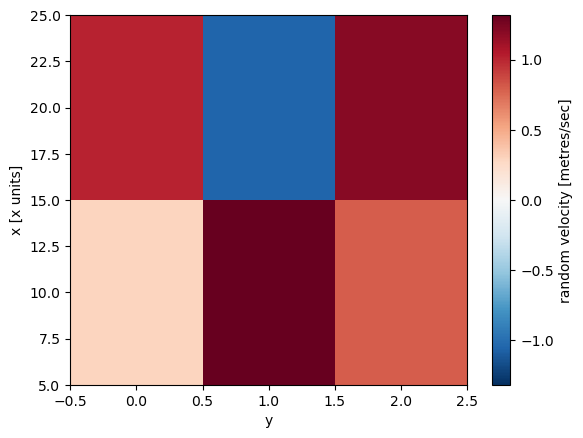

In [34]:
data.plot()
# automatic labeling with names and units

In [35]:
series = data.to_series()
print(series)
series.to_xarray()

x   y
10  0    0.297415
    1    1.316884
    2    0.800949
20  0    1.015558
    1   -1.053315
    2    1.200870
dtype: float64


<xarray.DataArray (x: 2, y: 3)>
array([[ 0.29741497,  1.31688425,  0.80094937],
       [ 1.01555764, -1.0533153 ,  1.20086953]])
Coordinates:
  * x        (x) int64 10 20
  * y        (y) int64 0 1 2

In [36]:
ds = xr.Dataset(dict(foo=data, bar=("x", [1, 2]), baz=np.pi))
ds

<xarray.Dataset>
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Data variables:
    foo      (x, y) float64 0.2974 1.317 0.8009 1.016 -1.053 1.201
    bar      (x) int64 1 2
    baz      float64 3.142

In [37]:
print(ds["foo"])
print(ds.foo)

<xarray.DataArray 'foo' (x: 2, y: 3)>
array([[ 0.29741497,  1.31688425,  0.80094937],
       [ 1.01555764, -1.0533153 ,  1.20086953]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:         random velocity
    units:             metres/sec
    description:       A random variable created as an example.
    random_attribute:  123
<xarray.DataArray 'foo' (x: 2, y: 3)>
array([[ 0.29741497,  1.31688425,  0.80094937],
       [ 1.01555764, -1.0533153 ,  1.20086953]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:         random velocity
    units:             metres/sec
    description:       A random variable created as an example.
    random_attribute:  123


In [38]:
ds.bar.sel(x=10)

<xarray.DataArray 'bar' ()>
array(1)
Coordinates:
    x        int64 10

In [39]:
# MANIPULATONG NETCDF FILES

In [40]:
ds.to_netcdf("example.nc")

In [41]:
reopened = xr.open_dataset("example.nc")
reopened

<xarray.Dataset>
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Data variables:
    foo      (x, y) float64 ...
    bar      (x) int64 ...
    baz      float64 ...